# Envlope with Hilbert Transformation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
import scipy.signal as sig
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

signal_c = chirp(t, 20.0, t[-1], 100.0)
signal =  signal_c*(1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t))

In [ ]:
# https://www.youtube.com/watch?v=VyLU8hlhI-I

In [8]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

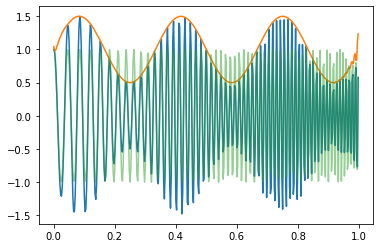

In [11]:
plt.plot(t, signal, label='signal')
plt.plot(t, amplitude_envelope, label='envelope')
plt.plot(t,signal_c, alpha=0.5)
plt.show()

C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


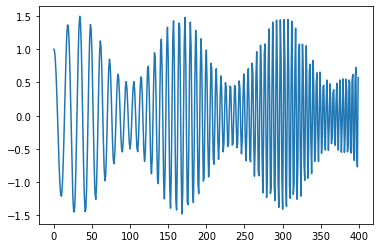

In [13]:
plt.plot(analytic_signal)

In [14]:
type(analytic_signal)

numpy.ndarray

In [15]:
analytic_signal

array([ 1.        -0.29786271j,  0.97295768+0.12613297j,
        0.84319119+0.53077936j,  0.61685866+0.78562781j,
        0.31165687+1.00564738j, -0.04395215+1.06441205j,
       -0.41296169+1.03863128j, -0.75341365+0.85137483j,
       -1.02308934+0.58232898j, -1.18482474+0.20063937j,
       -1.21181324-0.20073125j, -1.09216072-0.62016699j,
       -0.8319516 -0.96183027j, -0.45619014-1.21673216j,
       -0.00720057-1.30938274j,  0.4596103 -1.25239606j,
        0.88233759-1.01309591j,  1.20081779-0.64442396j,
        1.3654765 -0.16266236j,  1.34549858+0.34327633j,
        1.13496981+0.82734622j,  0.75578765+1.194313j  ,
        0.25651065+1.40764623j, -0.29311808+1.40726756j,
       -0.81154718+1.20531737j, -1.21755327+0.80538766j,
       -1.44338742+0.28177776j, -1.4467994 -0.30486559j,
       -1.21975789-0.84458368j, -0.79202444-1.26444949j,
       -0.22845951-1.47497957j,  0.3800417 -1.45042293j,
        0.93092382-1.17354369j,  1.3274956 -0.70045004j,
        1.49662849-0.09534138j,

In [ ]:
## manual Hibert
# 1 FFT
# 2 rotated fCoefs
# 3 iFFT


In [17]:
audio_file = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\slider\id_02\normal\00000001.wav'

In [18]:
import librosa

In [19]:
audio_ch  = librosa.load(audio_file, sr=None, mono=False)

In [39]:
fs = audio_ch[1]
samples = len(audio_ch[0][0])
t = np.arange(samples) / fs

In [24]:
samples

160000

In [40]:
analytic_signal = hilbert(audio_ch[0][0])
amplitude_envelope = np.abs(analytic_signal)

(1.0, 1.2)

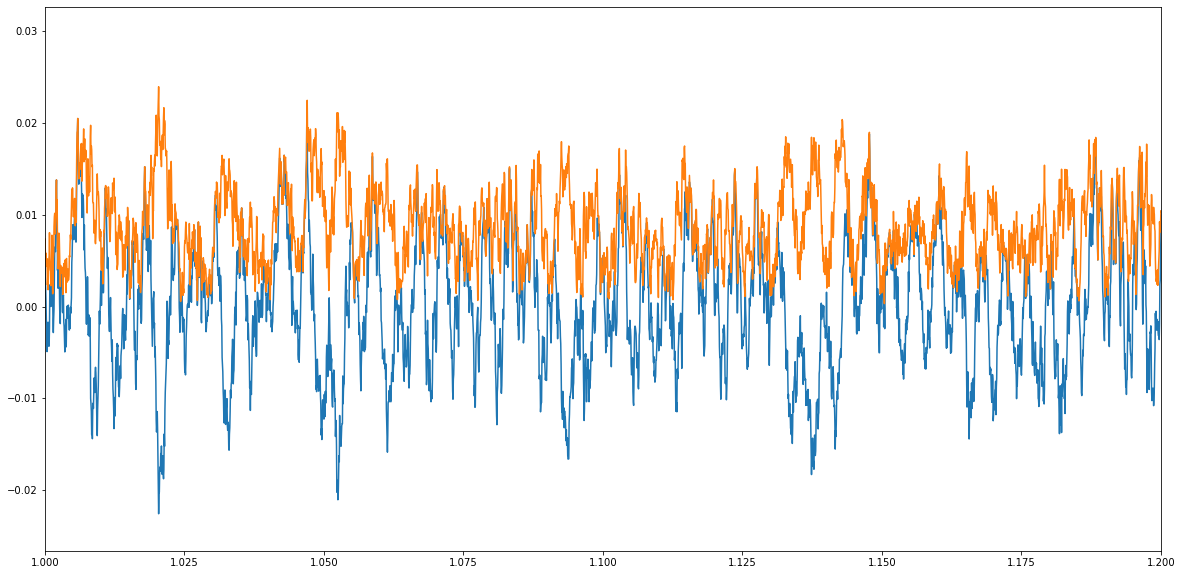

In [41]:
plt.figure(figsize=(20,10))
plt.plot(t, audio_ch[0][0], label='signal')
plt.plot(t, amplitude_envelope, label='envelope')
plt.xlim((1,1.2))

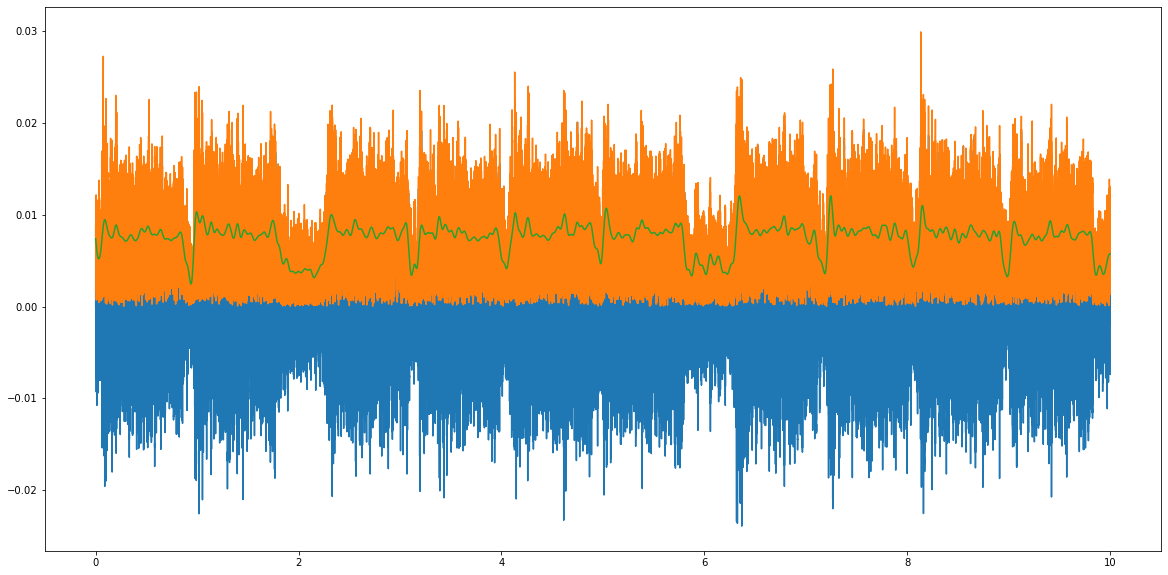

In [52]:

b, a = sig.butter(4, 0.002)
y = sig.filtfilt(b, a, amplitude_envelope, padlen=150)
plt.figure(figsize=(20,10))
plt.plot(t, audio_ch[0][0], label='signal')
plt.plot(t, amplitude_envelope, label='envelope')
plt.plot(t, y, label='envelope')
#plt.xlim((1,1.2))

In [54]:
import scipy.stats as st


In [55]:
st.kurtosis(y)

0.7925958055663114

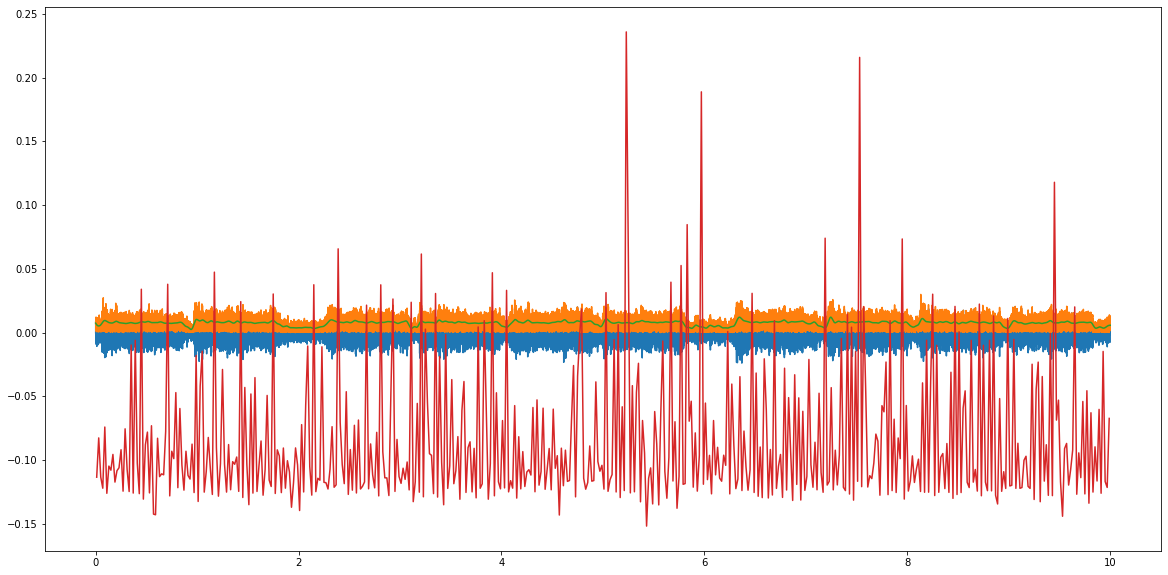

In [68]:
frames = 500
samp_frame=len(audio_ch[0][0])//frames
kt = []
ksim = []
for fra in range(0,frames):
    sp = samp_frame*fra
    frame_values = y[sp:sp+samp_frame-1] #audio_ch[0][0]
    kt.append(t[samp_frame//2+sp])
    ksim.append(st.kurtosis(frame_values)*0.1)

plt.figure(figsize=(20,10))
plt.plot(t, audio_ch[0][0], label='signal')
plt.plot(t, amplitude_envelope, label='envelope')

plt.plot(t, y, label='envelopeLP')
plt.plot(kt, ksim, label='envelopeKurt')
    

In [ ]:
np.wehrenp.array(ksim)